In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

df = pd.read_csv('merged10.csv')

print(np.shape(df.values[:,:]))

(2610, 120)


In [4]:
data = df.values[:, 4:107].astype(float)
target = df.values[:, 107:120].astype(int)
d_name = np.array(df.columns[4:107])
t_name = np.array(df.columns[107:120])
target1 = target[:,11] # Change this value from 7-12 to change target set 

# For Merged10 - Feature 4:107, Target 106:109 or 17:109????

In [6]:
#Target set name
#d_name[[1,0,100,26,15,101,99,24,29,98,6,3,27,25,102]] #for incidence
#d_name[[2,1,3,0,29,26,45,95,63,19,8,74,39,49,12]] # for mortality
d_name[[1,0,98,101,63,29,7,3,100,25,99,65,6,24,26]] # for case fatality

array(['Long', 'Lat', 'percent_smokers', 'percent_adults_with_obesity',
       'Otolaryngology..AAMC.', 'MEDHHINC_2018', 'INTERNATIONALMIG2019',
       'NPOPCHG_2019', 'percent_excessive_drinking',
       'Percent.of.adults.with.a.high.school.diploma.only.2014.18',
       'percent_physically_inactive', 'Plastic.Surgery..AAMC.',
       'NATURALINC2019',
       'Percent.of.adults.with.less.than.a.high.school.diploma.2014.18',
       'Percent.of.adults.completing.some.college.or.associate.s.degree.2014.18'],
      dtype=object)

In [5]:
for i in range(0, 103):
    print(i, d_name[i])

0 Lat
1 Long
2 POPESTIMATE2019
3 NPOPCHG_2019
4 BIRTHS2019
5 DEATHS2019
6 NATURALINC2019
7 INTERNATIONALMIG2019
8 DOMESTICMIG2019
9 NETMIG2019
10 CommutingIn
11 TotEmp
12 QPayroll
13 APayroll
14 Establishments
15 Income
16 GDP
17 Rural.urban_Continuum.Code_2013
18 Urban_Influence_Code_2013
19 Economic_typology_2015
20 Less.than.a.high.school.diploma.2014.18
21 High.school.diploma.only.2014.18
22 Some.college.or.associate.s.degree.2014.18
23 Bachelor.s.degree.or.higher.2014.18
24 Percent.of.adults.with.less.than.a.high.school.diploma.2014.18
25 Percent.of.adults.with.a.high.school.diploma.only.2014.18
26 Percent.of.adults.completing.some.college.or.associate.s.degree.2014.18
27 Percent.of.adults.with.a.bachelor.s.degree.or.higher.2014.18
28 POVALL_2018
29 MEDHHINC_2018
30 Density.per.square.mile.of.land.area...Population
31 Density.per.square.mile.of.land.area...Housing.units
32 Total_Male
33 Total_Female
34 Total_age18to64
35 Male_age18to64
36 Female_age18to64
37 Total_age65plus
38 Mal

# Data Processing

In [13]:
from sklearn.decomposition import PCA

#PCA Transform + Whiten
X = data.copy()
pca = PCA(whiten = True); #Set to false for no whiten
X_white = pca.fit_transform(X);

#Data shuffel and Resplit
#D = np.hstack((X_white, target1[:,newaxis])) #uncomment for PCA transformed version
D = np.hstack((data, target1[:,newaxis])) #uncomment for no PCA transformed version
Dc = D.copy()

np.random.seed(seed=2019)
np.random.shuffle(Dc)
seed = 2019

X, C = Dc[:, :103], Dc[:, 103]

# Classifier Testing

In [14]:
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
#k-NN
score_kNN = [];

for k in range(1,50):
    clf = neighbors.KNeighborsClassifier(k, weights='distance')
    #clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    score_kNN.append(np.mean(cross_val_score(clf, X, C, cv=3)))

best = np.max(score_kNN)
k = np.argmax(score_kNN) + 1

print('Best k-NN classifier:', best , 'for', k)
#0.5731800766283525

In [ ]:
#Class Priors
classes = np.unique(C).astype(int)
prior = np.ones((2, classes.size))
prior[0] = prior[0] / classes.size;
z = size(unique(C))

for k in classes:
    members = (C == k)
    num = members.sum()
    prior[1,k+z] = num / C.size

In [ ]:
#Gaussian NaiveBayes
score_gnb = [];

for p in prior:
    gnb = GaussianNB(priors=p)
    score_gnb.append(np.mean(cross_val_score(gnb, X, C, cv=3)))

best = np.max(score_gnb)
k = np.argmax(score_gnb)

print('Best gnb classifier:', best, 'for', prior[k])

In [ ]:
#LDA
score_lda = [];

for p in prior:
    lda = LDA(priors=p)
    score_lda.append(np.mean(cross_val_score(lda, X, C, cv=3)))

best = np.max(score_lda)
k = np.argmax(score_lda)

print('Best LDA classifier:', best, 'for', prior[k])

In [ ]:
#QDA
score_qda = [];

for p in prior:
    
    qda = QDA(priors=p)
    score_qda.append(np.mean(cross_val_score(qda, X, C, cv=3)))

best = np.max(score_qda)
k = np.argmax(score_qda)

print('Best QDA classifier:', best, 'for', prior[k])

In [ ]:
#Decision Tree
score_tree = [];

for depth in range(1,50):
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=seed)
    score_tree.append(np.mean(cross_val_score(clf, X,C, cv=3)))

best = np.max(score_tree)
k = np.argmax(score_tree) + 1

print('Best tree classifier:', best, 'for', k)

In [ ]:
#Random Forest
score_RF = [];

for depth in range(1,20):
    clf = RandomForestClassifier(max_depth=depth, random_state=seed)
    score_RF.append(np.mean(cross_val_score(clf, X, C, cv=3)))
    
best = np.max(score_RF)
k = np.argmax(score_RF) + 1

print('Best random forest classifier:', best, 'for', k)

In [ ]:
#SVM
score_SVM = [];
kern = ['poly','rbf','sigmoid','linear']

for k in kern:
    clf = SVC(kernel=k) 
    score_SVM.append(np.mean(cross_val_score(clf, X, C, cv=3)))

best = np.max(score_SVM)
k = kern[np.argmax(score_SVM)]
               
print('Best SVM classifier:', best, 'for', k)

In [ ]:
#Neural Network
score_NN = [];
actv = ['identity', 'logistic', 'tanh', 'relu']
solv = ['lbfgs', 'sgd', 'adam']

#for k in actv:
#for k in solv:
for k in range(200,2200,400):
    #clf = MLPClassifier(hidden_layer_sizes=(100,), activation=k, solver='adam', max_iter=2000, random_state=seed)
    #clf = MLPClassifier(hidden_layer_sizes=(100,), activation='identity', solver=k, max_iter=2000, random_state=seed)
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='identity', solver='sgd', max_iter=k, random_state=seed)
    score_NN.append(np.mean(cross_val_score(clf, X, C, cv=3)))

best = np.max(score_NN)
k = np.argmax(score_NN) 

print('Best Neural Network:', best, 'for', k)

In [ ]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=3,random_state=seed)
print(np.mean(cross_val_score(clf, X, C, cv=3)))

In [ ]:
#XGBoost
import xgboost as xgb
score_xgb = [];

for k in range(1,2):
    clf = xgb.XGBClassifier(eta=0.1, max_depth=4, min_child_weight=8, gamma=0, subsample=1, colsample_bytree=0.1, alpha=0, n_estimators=83)
    score_xgb.append(np.mean(cross_val_score(clf, X, C, cv=3)))

best = np.max(score_xgb)
k = np.argmax(score_xgb) + 1

print('Best XGBoost:', best, 'for', k)

# Feature Importance

In [15]:
from matplotlib.pylab import rcParams
from sklearn import metrics 
import xgboost as xgb

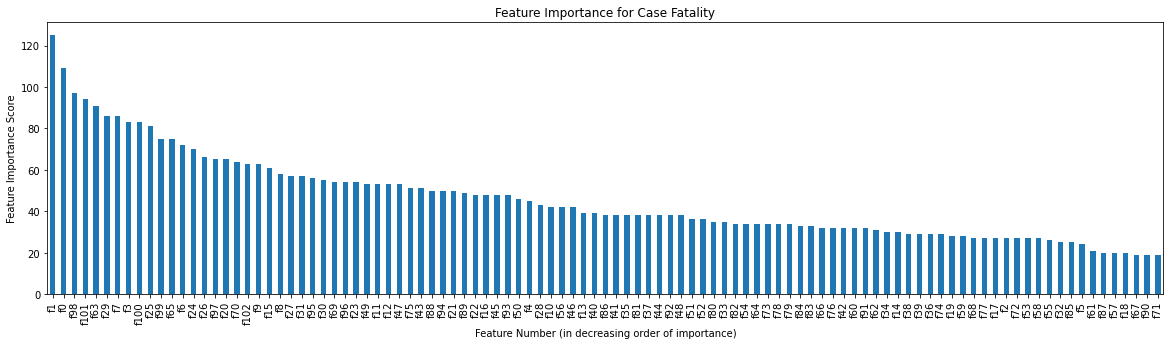

In [16]:
xgb1 = xgb.XGBClassifier(eta=0.1, max_depth=4, min_child_weight=8, gamma=0, subsample=1, colsample_bytree=0.1, alpha=0, n_estimators=83)
xgb1.fit(data, target1)                   

figure(figsize = (20,5))
feat_imp = pd.Series(xgb1.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance for Case Fatality')
ylabel('Feature Importance Score')
xlabel('Feature Number (in decreasing order of importance)')
savefig('1_FeatImp_case_fatality', dpi=200);

In [ ]:
d_name[[0,1,6,15,30,49,70,26,7,100,20,3,25,31,47]];
feat_imp

# Solution Visualization


Number of mislabeled points out of a total 1305 points : 532


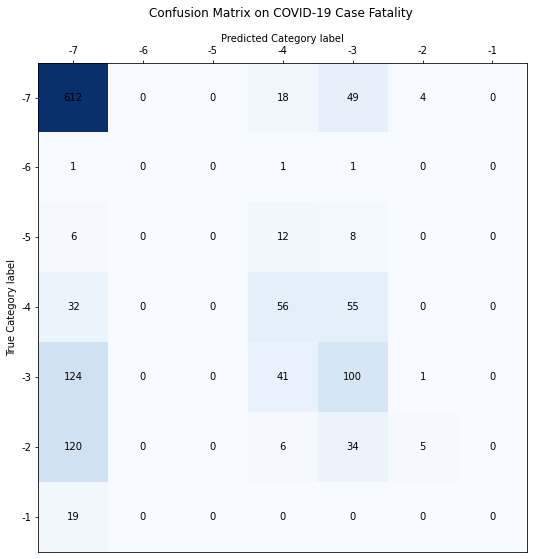

In [17]:
#Visualization with CV
from sklearn.metrics import confusion_matrix

D = np.hstack((data, target1[:, newaxis])) #((X_white, target1[:, newaxis]))
Dc = D.copy()

np.random.seed(seed=2019)
np.random.shuffle(Dc)

cv = 2
split = int(Dc[:,0].size/cv)
index = (cv-1) * split


X_train, C_train = Dc[:index, :103], Dc[:index, 103]
X_test, C_true = Dc[index:, :103], Dc[index:, 103]

#clf = xgb.XGBClassifier(eta=0.1, max_depth=10, min_child_weight=5, gamma=0, subsample=1,  colsample_bytree=1, alpha=0, n_estimators=82)
#clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=seed)
clf = xgb.XGBClassifier(eta=0.1, max_depth=4, min_child_weight=8, gamma=0, subsample=1, colsample_bytree=0.1, alpha=0, n_estimators=83)
C_pred = clf.fit(X_train, C_train).predict(X_test)


print("Number of mislabeled points out of a total %3d points : %2d" \
        % (X_test.shape[0],(C_true!=C_pred).sum()))

#Visualizing using a Color Map
CM = confusion_matrix(C_true, C_pred, labels=[-7,-6,-5,-4,-3,-2,-1]); 
#l = ['-','-10', '-9', '-8', '-7', '-6', '-5','-4','-3']; #[-10,-9,-8,-7,-6,-5,-4,-3]
#l = ['-','-14','-13','-12','-11','-10','-9','-8','-7']; #[-14,-13,-12,-11,-10,-9,-8,-7]
l = ['-','-7','-6','-5','-4','-3','-2','-1']; #[-7,-6,-5,-4,-3,-2,-1]

fig, ax = plt.subplots(figsize=(15, 9))
ax.matshow(CM, cmap=plt.cm.Blues)
ax.set(title='Confusion Matrix on COVID-19 Case Fatality \n', ylabel='True Category label', xlabel='Predicted Category label');
ax.xaxis.set_ticklabels(l); ax.yaxis.set_ticklabels(l);
ax.xaxis.set_label_position('top'); ax.xaxis.tick_top();
for i in range(7):
    for j in range(7):
        c = CM[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

savefig('2_CM_case_fatality', dpi=200);

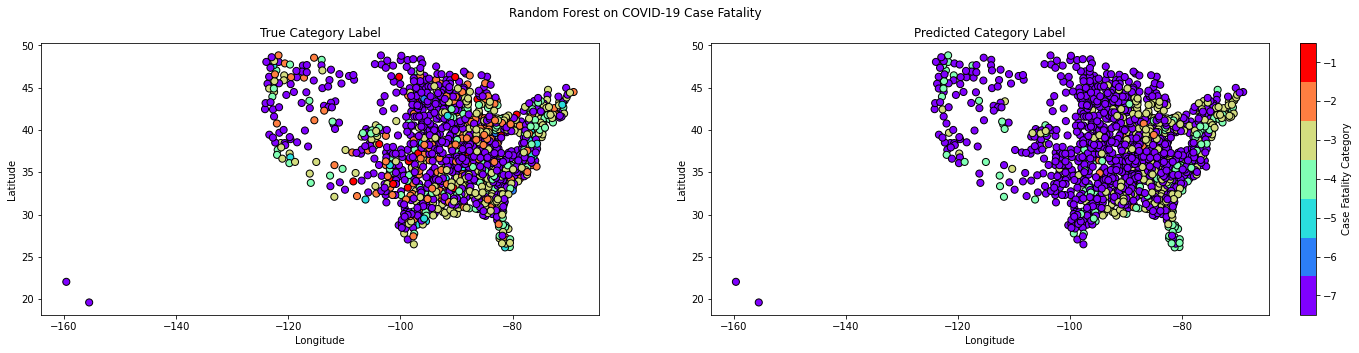

In [18]:
# Visualization using plot
i, j = 1, 0;
k, l = min(C_true), max(C_true);
fig = plt.figure(figsize=(22,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

fig.suptitle('Random Forest on COVID-19 Case Fatality')
p1 = ax1.scatter(X_test[:, i], X_test[:, j], c = C_true, cmap = cm.rainbow, s = 50, edgecolor = 'k');
ax1.set_title('True Category Label')
ax1.set_xlabel('Longitude');
ax1.set_ylabel('Latitude');
p2 = ax2.scatter(X_test[:, i], X_test[:, j], c = C_pred, cmap = cm.rainbow, s = 50, edgecolor = 'k', vmin=k, vmax=l);
ax2.set_title('Predicted Category Label');
ax2.set_xlabel('Longitude');
ax2.set_ylabel('Latitude');

bnd = unique(C_true) + 0.5
bnd = insert(bnd, 0, min(bnd)-1)
tik = unique(C_true)
cbar_ax = fig.add_axes([0.92,0.125,0.01,0.755]);
cbar = fig.colorbar(p1, cax=cbar_ax, boundaries=bnd, ticks=tik)
cbar.set_label('Case Fatality Category')


savefig('3_PLT_case_fatality', dpi=200);